In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

In [2]:
# unchanged from prev. exercise.
rewards = [0, -1, 0, -10, 4, 3, 7, 5]
is_terminal = [False, False, False, True, False, True, True, True]
T = [ 
    [1, 2],  # in state s0, taking action a0 brings us to state s1, a1 to s2
    [3,4],   # in state s1, taking action a0 brings us to state s3, a1 to s4
    [6,5],   # in state s2, taking action a0 brings us to state s6, a1 to s5
    [-1, -1], # state s3 is a terminal state. next-state is undefined (we use -1 here).
    [7, 7],   # from state s4, both actions lead to state s7
    [-1, -1], # state s5 is a terminal state
    [-1, -1], # state s6 is a terminal state
    [-1, -1]  # state s7 is a terminal state
]


In [3]:
# The (current) value for each state
V = [0, 0 , 0, 0, 0, 0, 0, 0]

# The value at each state AND each time-step
V_t = [[0],[0],[0],[0],[0],[0],[0],[0]] # initialize with 0

# The trial-by-trial RPE, for each state (the state s, not s')
RPE_t = [[],[],[],[],[],[],[],[]]  # .append also works for empty lists 

# try different learning rates
alpha = 0.001

# ignore for now (it's the discount factor)
gamma = 1.0

In [4]:
epsilon = 0.97
epsilon_t = []

def get_best_next_state(current_state):
    r0 = rewards[T[current_state][0]]
    r1 = rewards[T[current_state][1]]
    if r0 > r1:
        return 0
    
    return 1

In [5]:
for x in range(100000):
    # the agent starts at state s0.
    current_state = 0
    while (not is_terminal[current_state]):
  
        if random.randint(0,1) > epsilon:
            action = get_best_next_state(current_state)
        else:
            action = random.randint(0,1) 
        
        # update epsilon
        epsilon_t.append(epsilon)

        next_state = T[current_state][action]
        r = rewards[next_state] # use lower case r for the immediate reward. Upper case R is the sum of rewards, called Return.
        
        # calculate RPE
        rpe = r + gamma * V[next_state] - V[current_state]
        V[current_state] += alpha * rpe
        
        # V_st+1
        V_t[current_state].append(V[current_state])
        
        # calculate RPE
        RPE_t[current_state].append(rpe)

        # go to next state
        current_state = next_state
        
    epsilon = 0.9995 * epsilon

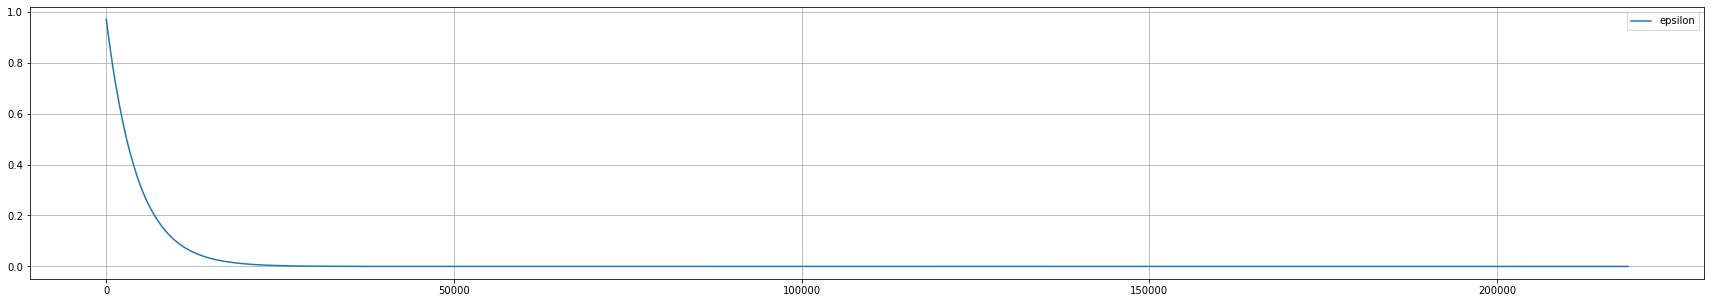

In [6]:
plt.figure(figsize=[30,5])
plt.plot(epsilon_t, label='epsilon')
plt.legend()
plt.grid()

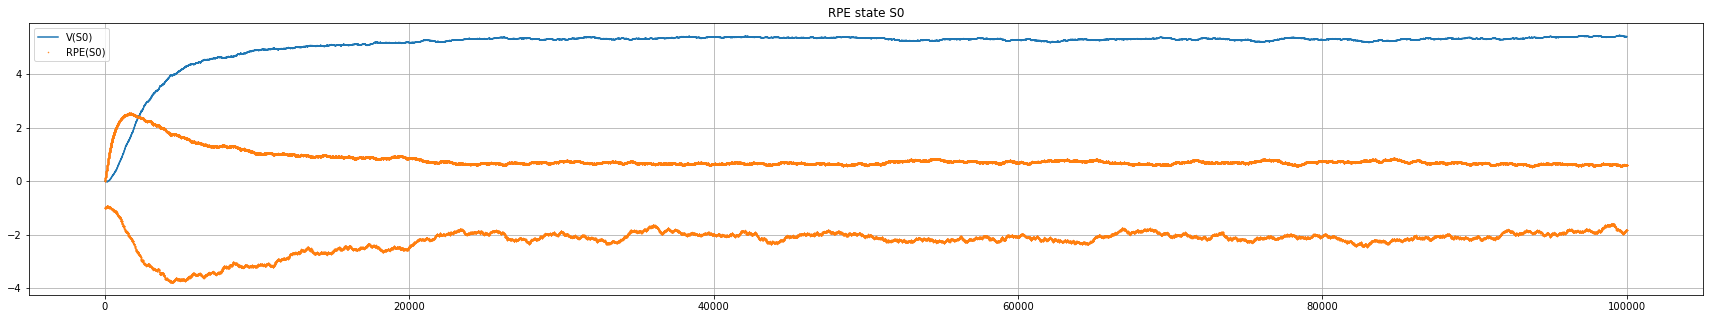

In [7]:
state = 0
plt.figure(figsize=[30,5])
plt.plot(V_t[state], label='V(S{})'.format(state))
plt.plot(RPE_t[state], 'o', label='RPE(S{})'.format(state), markersize=0.5)
plt.title('RPE state S{}'.format(state))
plt.legend()
plt.grid()

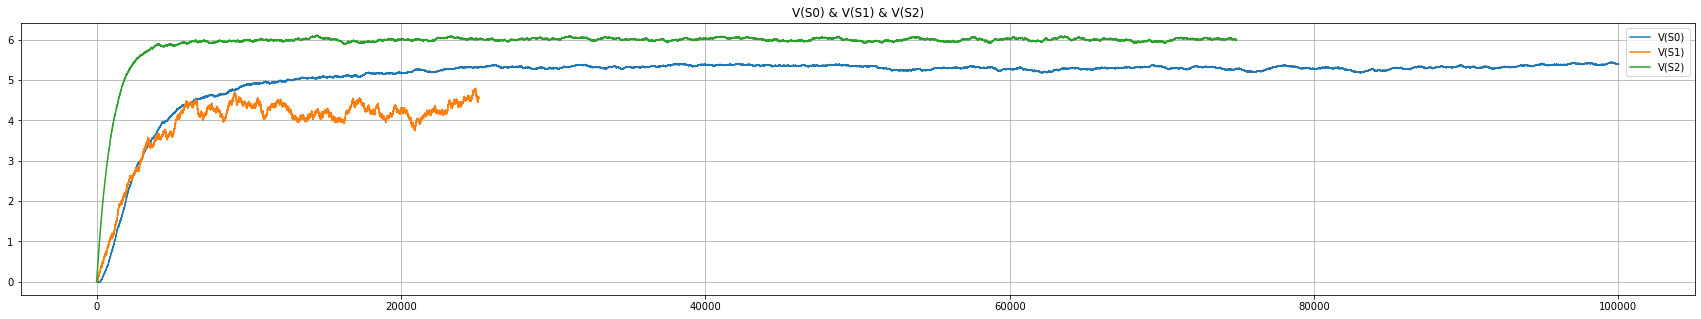

In [8]:
plt.figure(figsize=[30, 5])
plt.plot(V_t[0], label='V(S{})'.format(0))
plt.plot(V_t[1], label='V(S{})'.format(1))
plt.plot(V_t[2], label='V(S{})'.format(2))
plt.title('V(S0) & V(S1) & V(S2)')
plt.legend()
plt.grid()